### Pair Programming – Limpieza III

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?
2. Identifica visualmente los outliers
3. Identifica sobre el dataframe las filas que son outliers
4. Reemplaza los outliers por el estadístico más correcto.
5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [152]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv("datos/attacks_pandas_8.csv", index_col = 0)

In [154]:
df.head(2)

,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",57.0,White Shark,25-Jun-2018,Jun,N,F,usa
1,2018.06.03.a,2018.0,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",18.0,Tiger Shark,03-Jun-2018,Jun,Y,M,brazil


In [155]:
df.shape

(7789, 13)

In [156]:
df_numericas = df.select_dtypes(include = np.number)

In [157]:
# ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?


Tenemos sólo dos columnas numéricas para extraaer los outliers, la de "edad" y la de "year". En la columna de "edad", por ejemplo, los outliers podrían modificar demasiado la media y sería conveniente, a lo mejor, quitarlos. En la columna "year" también habría que considerar eliminar los outliers de fechas muy lejanas.

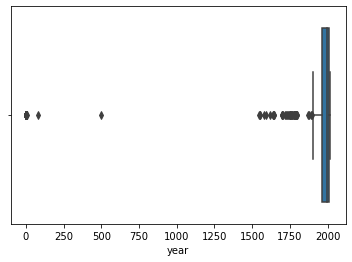

In [158]:
# Identifica visualmente los outliers.


sns.boxplot(x = df["year"], data = df)

plt.show();

In [159]:
df_numericas.sample(3)

,year,age
3894,NaN,NaN
6632,NaN,NaN
3377,NaN,NaN


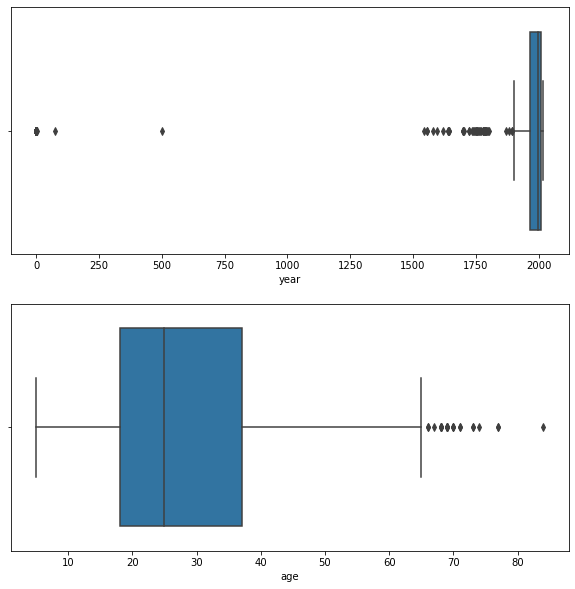

In [160]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    
plt.show() 

In [161]:
df["year"] = pd.to_numeric(df["year"])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7789 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_number         7788 non-null   object 
 1   year                1672 non-null   float64
 2   type                1672 non-null   object 
 3   country             1662 non-null   object 
 4   area                1626 non-null   object 
 5   location            1621 non-null   object 
 6   age                 1514 non-null   float64
 7   species_            7789 non-null   object 
 8   date                6286 non-null   object 
 9   mes                 5394 non-null   object 
 10  fatal_(y/n)_limpio  5678 non-null   object 
 11  sex                 7789 non-null   object 
 12  country_            1662 non-null   object 
dtypes: float64(2), object(11)
memory usage: 851.9+ KB


In [163]:
df.isnull().sum()

case_number              1
year                  6117
type                  6117
country               6127
area                  6163
location              6168
age                   6275
species_                 0
date                  1503
mes                   2395
fatal_(y/n)_limpio    2111
sex                      0
country_              6127
dtype: int64

In [164]:
# Identifica sobre el dataframe las filas que son outliers.

def detectar(lista_columnas, df):
    dict = {}
    for col in lista_columnas:
        print(col)
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
    
        if outlier_data.shape[0] > 0:
            dict[col] = list(outlier_data.index)
    
    return dict

In [165]:
Q1 = np.nanpercentile(df["year"], 25)

In [166]:
lista_columnas = df_numericas.columns

In [167]:
outliers = detectar(lista_columnas, df_numericas)

year
age


In [168]:
# Reemplaza los outliers por el estadístico más correcto.

In [169]:
for key, value in outliers:
    mediana = df.iloc[value].median



ValueError: too many values to unpack (expected 2)

In [ ]:
# Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente
# pair programming de limpieza.